In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [166]:
panel_a_cols = ['MolGen Isomers', 'Beilstein', 'NIST MS Database',
               'ADG Number of Isomers']
# there's also the 'Nominal Mass' col, which is going to be the x-axis.
panel_a_dat = pd.read_csv('../data/fig7_panel_a.csv')
panel_a_dat.replace('#DIV/0!', np.nan, inplace=True)

In [155]:
panel_b_dat = pd.read_csv('../data/fig7_panel_b.csv')
panel_b_dat.replace('#DIV/0!', np.nan, inplace=True)
panel_b_cols = ['BS/MG', 'NIST/MG', 'ADG/MG']
panel_b_dat.dropna(how='any', subset=(panel_b_cols + ['Nominal Mass']), inplace=True)

# There are some values equal to 0.0 which don't add any value to the plot and makes it messier, get rid of them
panel_b_dat.replace(0.00000, np.nan, inplace=True)
for col in panel_b_cols:
    panel_b_dat[col] = pd.to_numeric(panel_b_dat[col])
    print(panel_b_dat[col].dtype)

panel_b_dat

float64
float64
float64


,Nominal Mass,MolGen Isomers,Beilstein,NIST MS Database,ADG Number of Isomers,Nominal Mass.1,BS/MG,NIST/MG,ADG/MG
0,16.0,1,1.0,1.0,1.0,16.0,1.00000,1.000000,1.000000e+00
1,18.0,1,1.0,1.0,NaN,18.0,1.00000,1.000000,NaN
3,26.0,1,1.0,1.0,NaN,26.0,1.00000,1.000000,NaN
4,28.0,1,1.0,1.0,1.0,28.0,1.00000,1.000000,1.000000e+00
5,30.0,2,2.0,2.0,1.0,30.0,1.00000,1.000000,5.000000e-01
...,...,...,...,...,...,...,...,...,...
61,142.0,14498259,3902.0,290.0,418.0,142.0,0.00027,0.000020,3.000000e-05
62,144.0,18044479,2983.0,239.0,929.0,144.0,0.00017,0.000010,5.000000e-05
63,146.0,22884651,2299.0,181.0,676.0,146.0,0.00010,0.000008,3.000000e-05
64,148.0,35076496,2350.0,210.0,249.0,148.0,0.00007,0.000006,7.098770e-06


In [286]:
colors=['cornflowerblue', '#FBAE3C', 'tab:green', 'deeppink']
colors[-1] ='#FD4FA6' # tried adjusting the pink
colors[-3] = '#FEBF1C' # adjusted the orange to dark yellow
markers=['o', 'd', 'X', '*']
sizes = 64*np.ones(4)
sizes[-1] += 24
sizes

array([64., 64., 64., 88.])

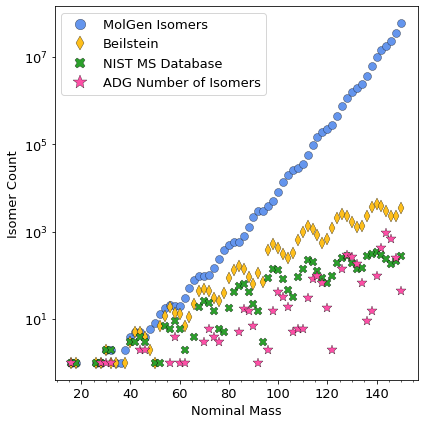

In [284]:
fig, ax = plt.subplots(figsize=(6,6))


ax.minorticks_on()
for y_col, colr, mark, size  in zip(panel_a_cols, colors, markers, sizes):
    '''sns.scatterplot(data=panel_a_dat, x='Nominal Mass', y=y_col, color=colr,
                    s=size, linewidth=0.5, #palette='Accent',
                    marker=mark, ec='k', label=y_col, legend='full')'''
    sns.lineplot(data=panel_a_dat, x='Nominal Mass', y=y_col, color=colr,
                    ms=size/8, linewidth=0, mew=0.3, #palette='Accent',
                    marker=mark, mec='k', label=y_col, legend='full')
plt.yscale('log')

ax.tick_params(axis='both', labelsize=13)

plt.xlabel('Nominal Mass', fontsize=13)
plt.ylabel('Isomer Count', fontsize=13)
plt.legend(fontsize=13, markerscale=1.3)
plt.tight_layout()
plt.savefig('fig7_panela.jpg', dpi=300)

7.41289e-07


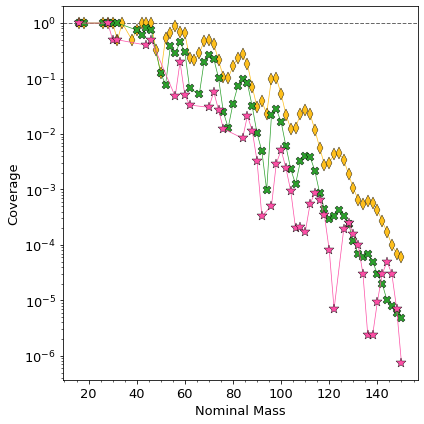

In [285]:
fig2, ax2 = plt.subplots(figsize=(6,6))

# set a continuum at y=1
ax2.axhline(y=1, xmin=0, xmax=1, ls='--', color='dimgray', lw=1.0)

for (y_col, mark, colr, size) in zip(panel_b_cols, markers[1:], colors[1:], sizes[1:]):
    sns.lineplot(data=panel_b_dat, x='Nominal Mass', y=y_col, color=colr, ms=size/8,
                 linewidth=0.7, mew=0.4,#palette='Accent',
                    marker=mark, mec='k', label=y_col, legend=False)
# for some reason, the y-axis limits weren't being handled nicely
# by the plotting routine, so here I adjusted them manually.
min_val = None
for y_col in panel_b_cols:
    min_val = min(val for val in panel_b_dat[y_col] if val > 0.0)
print(min_val)
ax2.set_ylim(top=2, bottom=min_val/2)

ax2.set_yscale('log')
#print(panel_b_dat['BS/MG'])
ax2.minorticks_on()
ax2.tick_params(axis='both', labelsize=13)

plt.xlabel('Nominal Mass', fontsize=13)
plt.ylabel('Coverage', fontsize=13)
#plt.legend(fontsize=13, markerscale=1.3, loc='upper right')
plt.tight_layout()
plt.savefig('fig7_panelb.jpg', dpi=300)